# Football Scores Predictor

# Introduction

## Data Scientist

- Ryan Mburu

## Problem Definition

-> This project aims at predicting results of a football game between two teams. 

## Context

The predictions will be based on the home team's rank, the away team's rank and the tournament they are participating in.

## Metric of Success

- Understanding the problem and datasets provided
- Performing data cleaning
- Performing EDA so as to get statistical visualizations and correlation between the features.
- Performing regression
- Model evaluation through cross validation, RMSE Scores, residual plots and Heteroscedascity

## Data relevance

the rankings are accurate as of the official FIFA wikipedia
 - https://en.wikipedia.org/wiki/FIFA_World_Rankings

# Data Understanding

In [270]:
#  Load in the Libraries to be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#Encoding
from sklearn.preprocessing import OrdinalEncoder

## Reading the data

### rankings Dataset

In [130]:
# First Dataset
rank = pd.read_csv('/Users/RyanMburu/Documents/DS-Projects/Supervised-Learning/FIFA-rankings/Datasets/fifa_ranking.csv')
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [131]:
# View last 5 records
rank.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [132]:
# View no of records and columns
rank.shape

(57793, 16)

### Results Dataset

In [133]:
# Load the dataset & Preview first 5 records
results = pd.read_csv('/Users/RyanMburu/Documents/DS-Projects/Supervised-Learning/FIFA-rankings/Datasets/results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [134]:
# Last 5 records
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [135]:
# Records and features
results.shape

(40839, 9)

The rankings dataset has 57K records and 16 columns

The results dataset has 40K records and 9 columns

# Data Cleaning

## Null Values

In [136]:
# Null values
rank.isna().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [137]:
results.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

## Duplicate Values

In [138]:
# Duplicates
rank.duplicated().sum()

# Duplicates will not be dropped as a country can maintain the same rank for multiple years e.g belgium been no 1 rank from 2018 upto now


37

In [139]:
results.duplicated().sum()

0

## Datatypes

In [140]:
# datatypes

rank.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [141]:
# Change the rank_date column to datetype

rank['date'] = pd.to_datetime(rank['rank_date'])
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993-08-08


In [142]:
# Extract year from the new column
rank['year'] = rank['date'].dt.year
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,year
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993-08-08,1993
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993-08-08,1993
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993-08-08,1993
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993-08-08,1993
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993-08-08,1993


In [143]:
# New Rank Dataframe with only rank, country name and total points for merging

new_rank = rank[['rank', 'country_full', 'total_points', 'year']]
new_rank

,rank,country_full,total_points,year
0,1,Germany,0.0,1993
1,2,Italy,0.0,1993
2,3,Switzerland,0.0,1993
3,4,Sweden,0.0,1993
4,5,Argentina,0.0,1993
...,...,...,...,...
57788,206,Anguilla,0.0,2018
57789,206,Bahamas,0.0,2018
57790,206,Eritrea,0.0,2018
57791,206,Somalia,0.0,2018


In [144]:
# Rename country full name
new_rank.rename(columns={'country_full' : 'country'}, inplace=True)
new_rank

/Users/RyanMburu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,rank,country,total_points,year
0,1,Germany,0.0,1993
1,2,Italy,0.0,1993
2,3,Switzerland,0.0,1993
3,4,Sweden,0.0,1993
4,5,Argentina,0.0,1993
...,...,...,...,...
57788,206,Anguilla,0.0,2018
57789,206,Bahamas,0.0,2018
57790,206,Eritrea,0.0,2018
57791,206,Somalia,0.0,2018


In [145]:
# Do the same for results table

results['new_date'] = pd.to_datetime(results['date'])
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,new_date
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872-11-30
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873-03-08
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874-03-07
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875-03-06
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876-03-04


In [146]:
# Year column
results['year'] = results['new_date'].dt.year
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,new_date,year
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True,2019-07-18,2019
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,2019-07-18,2019
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,2019-07-19,2019
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,2019-07-19,2019
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True,2019-07-20,2019


### Filter results table to only have matches that occurred after 1993

In [147]:
results = results[results['year'] > 1992]
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,new_date,year
17361,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993-01-01,1993
17362,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Libreville,Gabon,False,1993-01-02,1993
17363,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait City,Kuwait,False,1993-01-02,1993
17364,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Libreville,Gabon,True,1993-01-03,1993
17365,1993-01-03,Gabon,Ghana,2,3,Friendly,Libreville,Gabon,False,1993-01-03,1993
...,...,...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True,2019-07-18,2019
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,2019-07-18,2019
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,2019-07-19,2019
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,2019-07-19,2019


In [148]:
# new dataframe with important columns - year, home team, away,team, scores and tournament

new_results = results.drop(['date', 'city', 'country', 'neutral', 'new_date'], axis=1)
new_results

,home_team,away_team,home_score,away_score,tournament,year
17361,Ghana,Mali,1,1,Friendly,1993
17362,Gabon,Burkina Faso,1,1,Friendly,1993
17363,Kuwait,Lebanon,2,0,Friendly,1993
17364,Burkina Faso,Mali,1,0,Friendly,1993
17365,Gabon,Ghana,2,3,Friendly,1993
...,...,...,...,...,...,...
40834,American Samoa,Tahiti,8,1,Pacific Games,2019
40835,Fiji,Solomon Islands,4,4,Pacific Games,2019
40836,Senegal,Algeria,0,1,African Cup of Nations,2019
40837,Tajikistan,North Korea,0,1,Intercontinental Cup,2019


## Outliers

<AxesSubplot:>

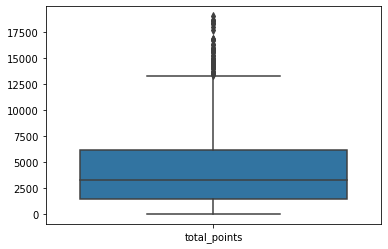

In [194]:
sns.boxplot(data=df_points_good)

The outliers represent successful teams with alot of points, therefore will not be removed

## Preview New Clean Datasets

In [125]:
# Rank table
new_rank

,rank,country,total_points,year
0,1,Germany,0.0,1993
1,2,Italy,0.0,1993
2,3,Switzerland,0.0,1993
3,4,Sweden,0.0,1993
4,5,Argentina,0.0,1993
...,...,...,...,...
57788,206,Anguilla,0.0,2018
57789,206,Bahamas,0.0,2018
57790,206,Eritrea,0.0,2018
57791,206,Somalia,0.0,2018


In [149]:
# results table
new_results

,home_team,away_team,home_score,away_score,tournament,year
17361,Ghana,Mali,1,1,Friendly,1993
17362,Gabon,Burkina Faso,1,1,Friendly,1993
17363,Kuwait,Lebanon,2,0,Friendly,1993
17364,Burkina Faso,Mali,1,0,Friendly,1993
17365,Gabon,Ghana,2,3,Friendly,1993
...,...,...,...,...,...,...
40834,American Samoa,Tahiti,8,1,Pacific Games,2019
40835,Fiji,Solomon Islands,4,4,Pacific Games,2019
40836,Senegal,Algeria,0,1,African Cup of Nations,2019
40837,Tajikistan,North Korea,0,1,Intercontinental Cup,2019


In [150]:
# rename home team name for merging
new_results.rename(columns={'home_team' : 'country'}, inplace=True)
new_results

,country,away_team,home_score,away_score,tournament,year
17361,Ghana,Mali,1,1,Friendly,1993
17362,Gabon,Burkina Faso,1,1,Friendly,1993
17363,Kuwait,Lebanon,2,0,Friendly,1993
17364,Burkina Faso,Mali,1,0,Friendly,1993
17365,Gabon,Ghana,2,3,Friendly,1993
...,...,...,...,...,...,...
40834,American Samoa,Tahiti,8,1,Pacific Games,2019
40835,Fiji,Solomon Islands,4,4,Pacific Games,2019
40836,Senegal,Algeria,0,1,African Cup of Nations,2019
40837,Tajikistan,North Korea,0,1,Intercontinental Cup,2019


## Merging the two datasets

In [168]:
# Merged the two datasets
merge_one = pd.merge(new_results, new_rank, how='inner')
#Dropped duplicates 
merge_one = merge_one.drop_duplicates()
merge_one


,country,away_team,home_score,away_score,tournament,year,rank,total_points
0,Ghana,Mali,1,1,Friendly,1993,48,0.00
1,Ghana,Mali,1,1,Friendly,1993,42,0.00
2,Ghana,Mali,1,1,Friendly,1993,40,0.00
3,Ghana,Mali,1,1,Friendly,1993,41,0.00
4,Ghana,Mali,1,1,Friendly,1993,37,0.00
...,...,...,...,...,...,...,...,...
225711,South Sudan,Burundi,2,5,African Cup of Nations qualification,2018,153,147.69
225713,South Sudan,Burundi,2,5,African Cup of Nations qualification,2018,154,147.69
225714,South Sudan,Burundi,2,5,African Cup of Nations qualification,2018,155,138.93
225715,South Sudan,Burundi,2,5,African Cup of Nations qualification,2018,157,129.65


In [169]:
merge_one.to_csv('merge2.csv')

In [170]:
# Cleaning the merged dataset

# 1. Rename columns
merge_one.rename(columns={'country' : 'home_team' , 'rank' : 'home_team_rank'}, inplace=True)
merge_one

,home_team,away_team,home_score,away_score,tournament,year,home_team_rank,total_points
0,Ghana,Mali,1,1,Friendly,1993,48,0.00
1,Ghana,Mali,1,1,Friendly,1993,42,0.00
2,Ghana,Mali,1,1,Friendly,1993,40,0.00
3,Ghana,Mali,1,1,Friendly,1993,41,0.00
4,Ghana,Mali,1,1,Friendly,1993,37,0.00
...,...,...,...,...,...,...,...,...
225711,South Sudan,Burundi,2,5,African Cup of Nations qualification,2018,153,147.69
225713,South Sudan,Burundi,2,5,African Cup of Nations qualification,2018,154,147.69
225714,South Sudan,Burundi,2,5,African Cup of Nations qualification,2018,155,138.93
225715,South Sudan,Burundi,2,5,African Cup of Nations qualification,2018,157,129.65


The merging occured on the renamed 'country' column, which was meant to represent the home team and trick pandas as its a unique variable

As FIFA changes its rankings very often, the new dataframe represents home team fixtures vs away team based on their FIFA rank and which year the game happened.

### *******************************************************************************

-> After merging, Ive seen the number of rows have almost tripled/quadrupled. This will lead to bias as teams are duplicating due to no unique identifiers in the datasets

-> Will work on the two cleaned dataframes independently

In [171]:
# rename home team name back to original name 
new_results.rename(columns={'country' : 'home_team'}, inplace=True)
new_results

,home_team,away_team,home_score,away_score,tournament,year
17361,Ghana,Mali,1,1,Friendly,1993
17362,Gabon,Burkina Faso,1,1,Friendly,1993
17363,Kuwait,Lebanon,2,0,Friendly,1993
17364,Burkina Faso,Mali,1,0,Friendly,1993
17365,Gabon,Ghana,2,3,Friendly,1993
...,...,...,...,...,...,...
40834,American Samoa,Tahiti,8,1,Pacific Games,2019
40835,Fiji,Solomon Islands,4,4,Pacific Games,2019
40836,Senegal,Algeria,0,1,African Cup of Nations,2019
40837,Tajikistan,North Korea,0,1,Intercontinental Cup,2019


In [172]:
new_rank.head()

,rank,country,total_points,year
0,1,Germany,0.0,1993
1,2,Italy,0.0,1993
2,3,Switzerland,0.0,1993
3,4,Sweden,0.0,1993
4,5,Argentina,0.0,1993


# Exploratory Data Analysis

## Univariate Analysis

* Will rank the teams based on total points

In [202]:
#Countries ranked df
df_points = new_rank.groupby(['country'])[['total_points']].sum().sort_values(by='total_points', ascending=False).reset_index()
df_points

,country,total_points
0,Germany,120550.45
1,Argentina,113037.00
2,Spain,111510.81
3,Brazil,103962.66
4,Portugal,99973.82
...,...,...
211,Serbia and Montenegro,0.00
212,RCS,0.00
213,Netherlands Antilles,0.00
214,Yugoslavia,0.00


In [206]:
# Points per year dataframe
df_points_year = new_rank.groupby(['country', 'year'])[['total_points']].sum().sort_values(by='year', ascending=False).reset_index()
df_points_year

,country,year,total_points
0,Zimbabwe,2018,1786.87
1,Bahrain,2018,1622.33
2,Mongolia,2018,312.38
3,Denmark,2018,6464.81
4,South Sudan,2018,843.47
...,...,...,...
5250,Guyana,1993,0.00
5251,Guinea-Bissau,1993,0.00
5252,Norway,1993,0.00
5253,Bolivia,1993,0.00


### Mean, mode, etc

In [189]:
new_rank['total_points'].describe()

count    57793.000000
mean       122.068637
std        260.426863
min          0.000000
25%          0.000000
50%          0.000000
75%         92.790000
max       1775.030000
Name: total_points, dtype: float64

The mean amount of points a country got is 122

### Histogram

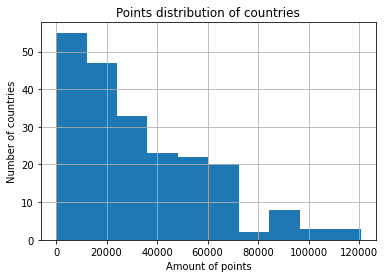

In [207]:
df_points['total_points'].hist()
plt.title('Points distribution of countries')
plt.xlabel('Amount of points')
plt.ylabel('Number of countries')
plt.show()

In [239]:
# Plot histogram of countries with more than 0 points
df_points_good = df_points[df_points['total_points'] > 0]
df_points_good

,country,total_points
0,Germany,120550.45
1,Argentina,113037.00
2,Spain,111510.81
3,Brazil,103962.66
4,Portugal,99973.82
...,...,...
206,Eritrea,1198.92
207,San Marino,1071.18
208,Somalia,980.26
209,Anguilla,197.72


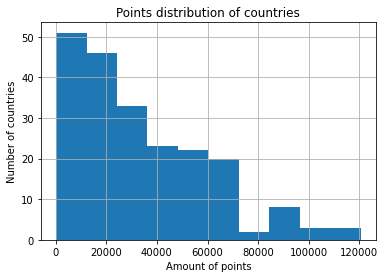

In [198]:
df_points_good['total_points'].hist()
plt.title('Points distribution of countries')
plt.xlabel('Amount of points')
plt.ylabel('Number of countries')
plt.show()

As seen, the distribution is skewed to the left, this shows as alot of countries in the world have little points and as the number of points inclease, the number of teams reduce

### Boxplot

<AxesSubplot:>

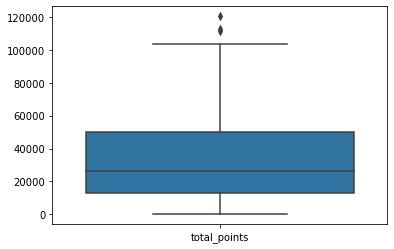

In [199]:
sns.boxplot(data=df_points_good)

### Barchat

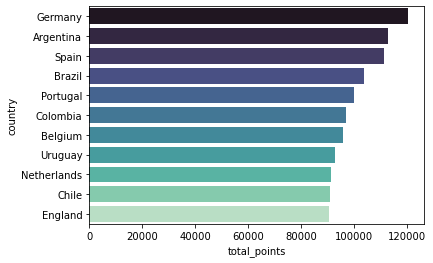

In [238]:
# Best countries viz

top_ten = df_points[df_points['total_points'] > 90500]
top_ten

sns.barplot(y='country', x='total_points', data=top_ten, orient='h', palette = 'mako')
plt.show()

## Bivariate Analysis

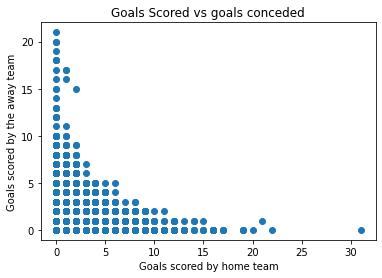

In [283]:
# Scatter Plot of goals scored by home team vs the away team
plt.scatter(x=results_predict['home_score'], y=results_predict['away_score'])
plt.title('Goals Scored vs goals conceded')
plt.xlabel('Goals scored by home team')
plt.ylabel('Goals scored by the away team')
plt.show()

As seen, the distribution is non-linear

<AxesSubplot:xlabel='year', ylabel='total_points'>

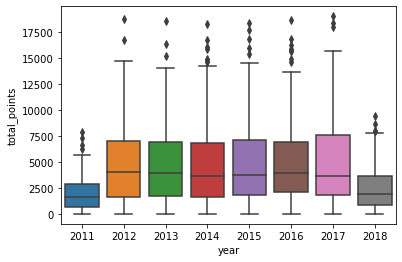

In [244]:
# Boxplot of points in the last 10 years
year_plot = df_points_year[df_points_year['year'] > 2010]
year_plot

sns.boxplot(x='year', y='total_points', data=year_plot)

<AxesSubplot:xlabel='year', ylabel='total_points'>

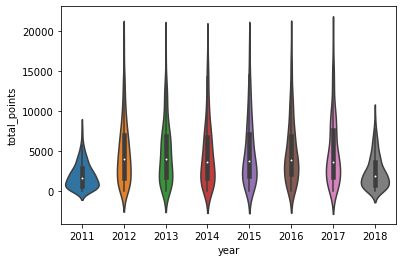

In [245]:
# Violin plot of points scored by national teams in the last 10 years
sns.violinplot(x='year', y='total_points', data=year_plot)

### Lineplot

<AxesSubplot:xlabel='year'>

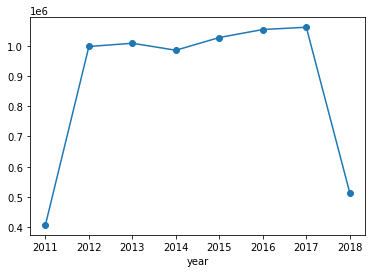

In [259]:
year_plot.groupby('year')['total_points'].sum().plot(marker='o')

## Multi-collinearity

In [260]:
new_rank.corr()

,rank,total_points,year
rank,1.000000,-0.343806,0.067991
total_points,-0.343806,1.000000,0.560579
year,0.067991,0.560579,1.000000


<AxesSubplot:>

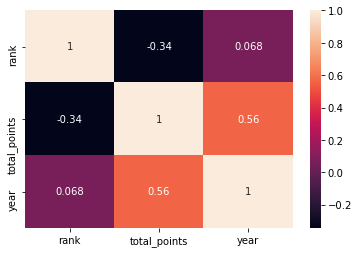

In [262]:
sns.heatmap(new_rank.corr(), annot=True)

# Regression

In [263]:
# Regression

# Lets view our datasets
new_rank

,rank,country,total_points,year
0,1,Germany,0.0,1993
1,2,Italy,0.0,1993
2,3,Switzerland,0.0,1993
3,4,Sweden,0.0,1993
4,5,Argentina,0.0,1993
...,...,...,...,...
57788,206,Anguilla,0.0,2018
57789,206,Bahamas,0.0,2018
57790,206,Eritrea,0.0,2018
57791,206,Somalia,0.0,2018


In [264]:
new_results

,home_team,away_team,home_score,away_score,tournament,year
17361,Ghana,Mali,1,1,Friendly,1993
17362,Gabon,Burkina Faso,1,1,Friendly,1993
17363,Kuwait,Lebanon,2,0,Friendly,1993
17364,Burkina Faso,Mali,1,0,Friendly,1993
17365,Gabon,Ghana,2,3,Friendly,1993
...,...,...,...,...,...,...
40834,American Samoa,Tahiti,8,1,Pacific Games,2019
40835,Fiji,Solomon Islands,4,4,Pacific Games,2019
40836,Senegal,Algeria,0,1,African Cup of Nations,2019
40837,Tajikistan,North Korea,0,1,Intercontinental Cup,2019


## Predicting how many goals the Home team will score

In [266]:
# Will need to encode the categorical columns bvefore feeding them onto the regressor

results_predict = new_results.copy()
results_predict

,home_team,away_team,home_score,away_score,tournament,year
17361,Ghana,Mali,1,1,Friendly,1993
17362,Gabon,Burkina Faso,1,1,Friendly,1993
17363,Kuwait,Lebanon,2,0,Friendly,1993
17364,Burkina Faso,Mali,1,0,Friendly,1993
17365,Gabon,Ghana,2,3,Friendly,1993
...,...,...,...,...,...,...
40834,American Samoa,Tahiti,8,1,Pacific Games,2019
40835,Fiji,Solomon Islands,4,4,Pacific Games,2019
40836,Senegal,Algeria,0,1,African Cup of Nations,2019
40837,Tajikistan,North Korea,0,1,Intercontinental Cup,2019


In [269]:
#Encode home_team, away_team, tournament
results_predict['home_team'].value_counts().count()

298

In [273]:
# Hometeam
encoder = OrdinalEncoder()

# Function that inputs the categorical column and creates a new colunm with encoded values

def encoderr(column):
    name = input('Enter Column name : ')
    results_predict[name] = encoder.fit_transform(results_predict[[column]])
    return results_predict

In [274]:
encoderr('home_team')

,home_team,away_team,home_score,away_score,tournament,year,HT_code
17361,Ghana,Mali,1,1,Friendly,1993,102.0
17362,Gabon,Burkina Faso,1,1,Friendly,1993,97.0
17363,Kuwait,Lebanon,2,0,Friendly,1993,143.0
17364,Burkina Faso,Mali,1,0,Friendly,1993,40.0
17365,Gabon,Ghana,2,3,Friendly,1993,97.0
...,...,...,...,...,...,...,...
40834,American Samoa,Tahiti,8,1,Pacific Games,2019,5.0
40835,Fiji,Solomon Islands,4,4,Pacific Games,2019,92.0
40836,Senegal,Algeria,0,1,African Cup of Nations,2019,232.0
40837,Tajikistan,North Korea,0,1,Intercontinental Cup,2019,261.0


In [275]:
# away team
encoderr('away_team')

,home_team,away_team,home_score,away_score,tournament,year,HT_code,AT_code
17361,Ghana,Mali,1,1,Friendly,1993,102.0,156.0
17362,Gabon,Burkina Faso,1,1,Friendly,1993,97.0,40.0
17363,Kuwait,Lebanon,2,0,Friendly,1993,143.0,144.0
17364,Burkina Faso,Mali,1,0,Friendly,1993,40.0,156.0
17365,Gabon,Ghana,2,3,Friendly,1993,97.0,99.0
...,...,...,...,...,...,...,...,...
40834,American Samoa,Tahiti,8,1,Pacific Games,2019,5.0,253.0
40835,Fiji,Solomon Islands,4,4,Pacific Games,2019,92.0,234.0
40836,Senegal,Algeria,0,1,African Cup of Nations,2019,232.0,4.0
40837,Tajikistan,North Korea,0,1,Intercontinental Cup,2019,261.0,182.0


In [276]:
#tournament
encoderr('tournament')

,home_team,away_team,home_score,away_score,tournament,year,HT_code,AT_code,Tournament_code
17361,Ghana,Mali,1,1,Friendly,1993,102.0,156.0,33.0
17362,Gabon,Burkina Faso,1,1,Friendly,1993,97.0,40.0,33.0
17363,Kuwait,Lebanon,2,0,Friendly,1993,143.0,144.0,33.0
17364,Burkina Faso,Mali,1,0,Friendly,1993,40.0,156.0,33.0
17365,Gabon,Ghana,2,3,Friendly,1993,97.0,99.0,33.0
...,...,...,...,...,...,...,...,...,...
40834,American Samoa,Tahiti,8,1,Pacific Games,2019,5.0,253.0,55.0
40835,Fiji,Solomon Islands,4,4,Pacific Games,2019,92.0,234.0,55.0
40836,Senegal,Algeria,0,1,African Cup of Nations,2019,232.0,4.0,7.0
40837,Tajikistan,North Korea,0,1,Intercontinental Cup,2019,261.0,182.0,38.0


In [304]:
results_predict.dtypes

home_team           object
away_team           object
home_score           int64
away_score           int64
tournament          object
year                 int64
HT_code            float64
AT_code            float64
Tournament_code    float64
dtype: object

In [370]:
# Lets assign the encoded values to X and y a so as to perform predictions
X = results_predict[['HT_code', 'AT_code', 'Tournament_code', 'year']].values
y = results_predict['home_score'].values

In [372]:
# Divide the dependent and independent variables to train set and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

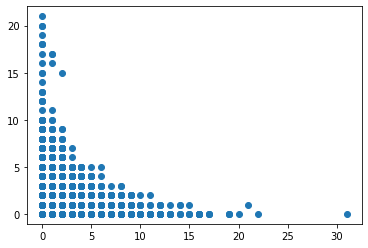

In [373]:
# As seen when performing EDA, the distribution of points is non-linear therefore a polynomial regressor will be applied.
plt.scatter(x=results_predict['home_score'], y=results_predict['away_score'])

As seen, the predicted goals dont pass through the values appropriately, therefore polynominal regression to be done

In [374]:
# Polynominal regression

# Build a polynominal regressor and train the inputs which have a degree of 5
home_poly = PolynomialFeatures(degree = 10)
x_poly = home_poly.fit_transform(X_train)
x_poly
# Run the polynomial through a linear regressor

home_linear = LinearRegression()
home_linear.fit(x_poly, y_train)

LinearRegression()

In [375]:
# Perform prediction using the test sample

y_pred = home_linear.predict(x_poly)

df_pred = pd.DataFrame({'OG Values' : y_train.flatten(), 'Predicted values' : y_pred.flatten()})
df_pred

,OG Values,Predicted values
0,3,1.535823
1,1,1.298473
2,2,2.104321
3,0,1.419987
4,1,2.166253
...,...,...
18777,4,1.711727
18778,2,1.387795
18779,0,1.549308
18780,1,1.544004


### RMSE Score

In [376]:
# RMSE score of home team goals
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Root Mean Squared Error: 1.6775715307697279


The RMSE of the model is 1.677, which is not ideal but we move

### Residual Plot

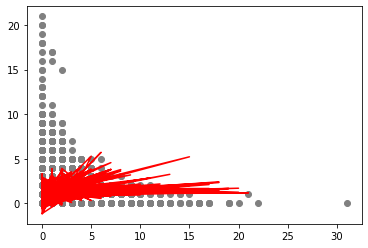

In [350]:
# Residual plot

#acha tucheat kidogo

plt.scatter(x=fake_x, y=fake_y, color='grey')
plt.plot(y_train, y_pred, color='red')

## Predicting Away team scores

- The same but the input in y will be the away team goals

In [377]:
# Lets assign the encoded values to X and y a so as to perform predictions
X = results_predict[['HT_code', 'AT_code', 'Tournament_code', 'year']].values
y_a = results_predict['away_score'].values

X_train, X_test, y_train_a, y_test_a = train_test_split(X, y_a, test_size=0.2, random_state=0)

In [378]:

# Build a polynominal regressor and train the inputs which have a degree of 5
home_poly = PolynomialFeatures(degree = 10)
x_poly = home_poly.fit_transform(X_train)
# x_poly
# Run the polynomial through a linear regressor

home_linear = LinearRegression()
home_linear.fit(x_poly, y_train_a)

LinearRegression()

In [379]:
y_pred_a = home_linear.predict(x_poly)

df_pred_a = pd.DataFrame({'OG Values' : y_train_a.flatten(), 'Predicted values' : y_pred_a.flatten()})
df_pred_a

,OG Values,Predicted values
0,2,1.101569
1,2,1.186108
2,2,1.093091
3,2,1.809338
4,1,1.671883
...,...,...
18777,1,1.033428
18778,0,0.982032
18779,0,1.229911
18780,0,1.064527


In [380]:
# RMSE Score
# RMSE score of home team goals
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train_a, y_pred_a)))

Root Mean Squared Error: 1.3436266282278666


The RMSE is 1.3, lower than  home team goals, but still very inaccurate. We getting somewhere tho :)

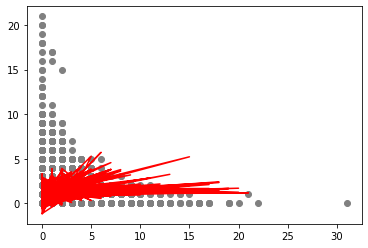

In [381]:

plt.scatter(x=fake_x, y=fake_y, color='grey')
plt.plot(y_train_a, y_pred_a, color='red')

# Logistic Regression

Will perform predictions based on whether the home team Won the game (W), Drew the game (D), or lost the game (L)

## Feature engineering

- New column based on the outcome of home score vs away score

In [386]:
# outline the conditions

conditions = [
    (results_predict['home_score'] > results_predict['away_score']),
    (results_predict['home_score'] == results_predict['away_score']),
    (results_predict['home_score'] < results_predict['away_score'])
]

# Values for each condition
values = ['W', 'D', 'L']

#new column where numpy will select values based on condition

results_predict['status'] = np.select(conditions, values)

results_predict


,home_team,away_team,home_score,away_score,tournament,year,HT_code,AT_code,Tournament_code,status
17361,Ghana,Mali,1,1,Friendly,1993,102.0,156.0,33.0,D
17362,Gabon,Burkina Faso,1,1,Friendly,1993,97.0,40.0,33.0,D
17363,Kuwait,Lebanon,2,0,Friendly,1993,143.0,144.0,33.0,W
17364,Burkina Faso,Mali,1,0,Friendly,1993,40.0,156.0,33.0,W
17365,Gabon,Ghana,2,3,Friendly,1993,97.0,99.0,33.0,L
...,...,...,...,...,...,...,...,...,...,...
40834,American Samoa,Tahiti,8,1,Pacific Games,2019,5.0,253.0,55.0,W
40835,Fiji,Solomon Islands,4,4,Pacific Games,2019,92.0,234.0,55.0,D
40836,Senegal,Algeria,0,1,African Cup of Nations,2019,232.0,4.0,7.0,L
40837,Tajikistan,North Korea,0,1,Intercontinental Cup,2019,261.0,182.0,38.0,L


In [387]:
# OK our feature engineering was a success, now lets encode the status column so as to have it in numerical format

# Will call the user defined function I created before polynomial regression

encoderr('status')

,home_team,away_team,home_score,away_score,tournament,year,HT_code,AT_code,Tournament_code,status,status_code
17361,Ghana,Mali,1,1,Friendly,1993,102.0,156.0,33.0,D,0.0
17362,Gabon,Burkina Faso,1,1,Friendly,1993,97.0,40.0,33.0,D,0.0
17363,Kuwait,Lebanon,2,0,Friendly,1993,143.0,144.0,33.0,W,2.0
17364,Burkina Faso,Mali,1,0,Friendly,1993,40.0,156.0,33.0,W,2.0
17365,Gabon,Ghana,2,3,Friendly,1993,97.0,99.0,33.0,L,1.0
...,...,...,...,...,...,...,...,...,...,...,...
40834,American Samoa,Tahiti,8,1,Pacific Games,2019,5.0,253.0,55.0,W,2.0
40835,Fiji,Solomon Islands,4,4,Pacific Games,2019,92.0,234.0,55.0,D,0.0
40836,Senegal,Algeria,0,1,African Cup of Nations,2019,232.0,4.0,7.0,L,1.0
40837,Tajikistan,North Korea,0,1,Intercontinental Cup,2019,261.0,182.0,38.0,L,1.0


- Draw is encoded as 0
- Win -> 2
- Lose -> 1

In [388]:
# Separate the data into dependent and independent features 

X = results_predict[['HT_code', 'AT_code', 'Tournament_code', 'year']].values
y = results_predict['status_code'].values

y

array([0., 0., 2., ..., 1., 1., 0.])

In [389]:
# Train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [390]:
# Build our logistic regressor

logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train)

LogisticRegression()

In [391]:
# Perform predictions
status_pred = logistic_regressor.predict(X_test)

In [393]:
# Comparison Table
df_comp = pd.DataFrame({'OG' : y_test, 'Predictions' : status_pred})
df_comp

,OG,Predictions
0,2.0,2.0
1,2.0,2.0
2,2.0,2.0
3,0.0,2.0
4,2.0,2.0
...,...,...
7039,2.0,2.0
7040,0.0,2.0
7041,2.0,2.0
7042,0.0,2.0


## Model Evaluation

## Confusion Matrix

In [394]:
# Lets use a Confusion matrix to see how many we got right and how many wrong
confused = confusion_matrix(y_test, status_pred)
confused

array([[   0,    0, 1690],
       [   0,    0, 2005],
       [   0,    0, 3349]])

We predicted 3,250 games accurately out of a possible 3 outcomes, so not bad as predicting football matches is difficult.

## RMSE Score

In [395]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, status_pred)))

Root Mean Squared Error: 1.1154915545582333


An RMSE of 1.1, which is lower than predicting exact goals of a team, therefore logistic regression is more reliable in this project over polynomial/linear regression

# Challenging our solution

My models could be better, as there were problems assigning rank sto individual teams, this is so as a team can have more than 10 different ranks in a single year, and our data has matches spanning from 1993!

Was a challenge but a good one for our Machine Learning journey.

The RMSE scores were all over 1, which is far from ideal but represents how unpredictable football, moreso international games can be.

Improvements to be made include assingning teams to world power ranks, which would improve our results as a team with a high power rank will almost certainly win over a lower rank one.

Might try with premier league teams who knows!